# TITANIC SURVIVAL PREDICTION

#### Use the Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or not. This is a classic beginner project with readily available data.
#### The dataset typically used for this project contains information about individual passengers, such as their age, gender, ticket class, fare, cabin, and whether or not they survived.

### Dataset : https://www.kaggle.com/datasets/yasserh/titanic-dataset

## Data Gatharning

In [3]:
# import OS and Pandas library

import os      # use for interacting with the operating system.
import pandas as pd     # use for data manipulation and analysis.

In [4]:
# install kaggle API (we use kaggle tatanic dataset)

In [5]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.


In [6]:
# environment variables are use to securely store sensitive information of kaggle data

os.environ['KAGGLE_USERNAME'] = 'ingalepradip'
os.environ['KAGGLE_KEY'] = '20db388060914916451561511e53be3e'

In [7]:
!kaggle datasets download -d yasserh/titanic-dataset

Dataset URL: https://www.kaggle.com/datasets/yasserh/titanic-dataset
License(s): CC0-1.0
titanic-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
# import library zipfile for work with ZIP archives

import zipfile

# Define the path to the downloaded zip file
zip_file_path = 'C:/Users/hp/titanic-dataset.zip'

# Define the directory where you want to extract the contents of the zip file
extract_dir = 'C:/Users/hp/titanic-dataset'

# Create the directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List the contents of the extraction directory to verify the extraction
extracted_files = os.listdir(extract_dir)
print("Extracted files:")
for file in extracted_files:
    print(file)


Extracted files:
Titanic-Dataset.csv


In [9]:
# Tatanic DataFrame

df = pd.read_csv('C:/Users/hp/titanic-dataset.csv')

## Data Information 

In [10]:
# First five rows of DataFrame

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
# To get a concise summary of the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
# To get summary statistics for numerical columns

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
# To get the dimensions of the DataFrame

df.shape

(891, 12)

## Data Cleaning 

In [14]:
# Check for missing values

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
# Impute missing values for 'Age' with median
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)

# Impute missing values for 'Embarked' with mode
mode_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(mode_embarked, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_11996\3251187320.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median_age, inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_11996\3251187320.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when d

In [16]:
# Remove Irrelevant Columns

df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [17]:
# create a list of categorical columns and continuous colums

cat=[]
con=[]

for i in df.columns:
    if df[i].dtypes=='object':
        cat.append(i)
    else:
        con.append(i) 
        
print ('Cat :', cat)
print ('con :', con)

Cat : ['Sex', 'Embarked']
con : ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


## Visualization

In [18]:
# Import library for visualization

import seaborn as sns

import matplotlib.pyplot as plt

In [19]:
# import warnings modules to ignore warnings massages

from warnings import filterwarnings
filterwarnings ('ignore')

Text(0.5, 1.0, 'Survival Distribution')

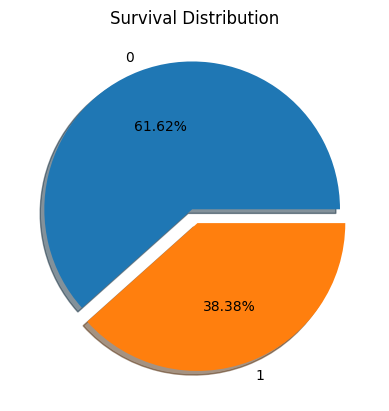

In [20]:
# Visualize the Survival distribution

size = df['Survived'].value_counts()
labels = size.index
plt.pie(size, labels=labels, explode=[0.05, 0.05], autopct='%1.2f%%', shadow=True)
plt.title('Survival Distribution')

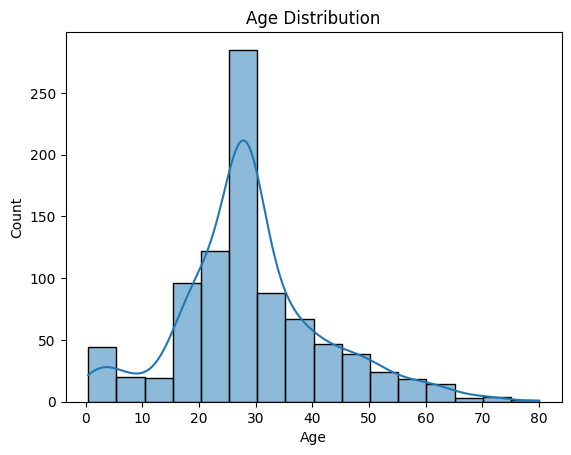

In [21]:
# Visualize the distribution of passenger ages

sns.histplot(data=df, x='Age', bins=16, kde=True)
plt.title('Age Distribution')
plt.show()

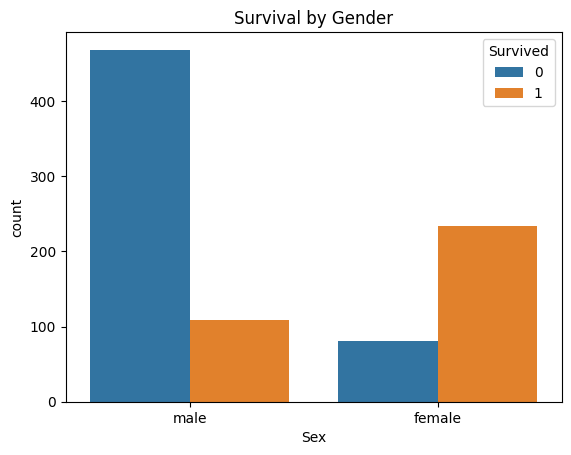

In [22]:
# Visualize the survival rate by gender.

sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender')
plt.show()

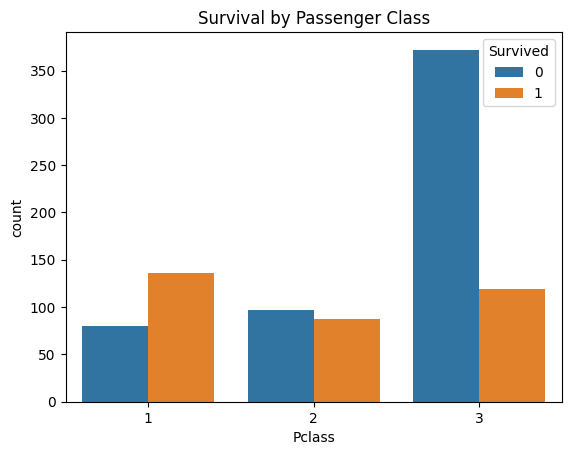

In [23]:
# Visualize the survival rate by passenger class

sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.show()


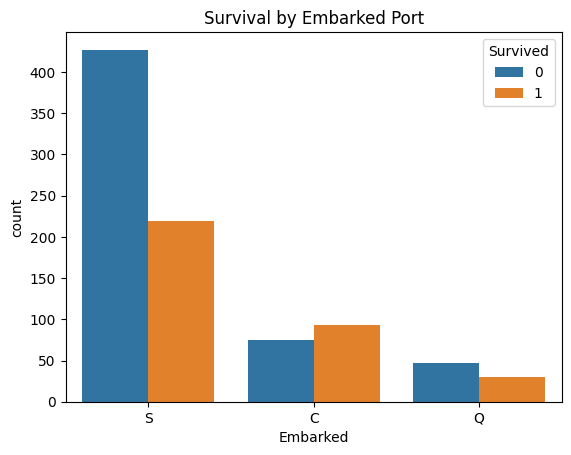

In [24]:
# Visualize the survival rate by the port of embarkation

sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival by Embarked Port')
plt.show()

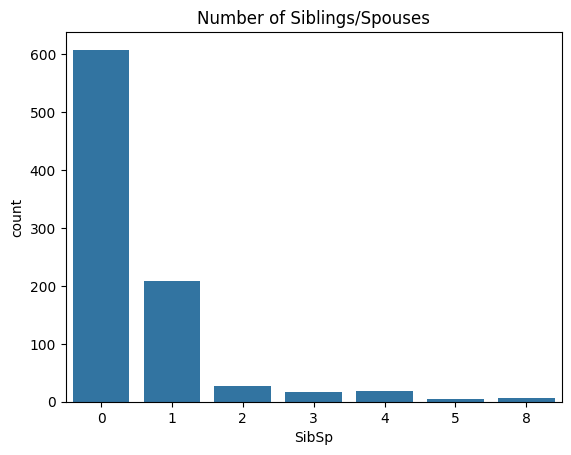

In [25]:
# Visualize the distribution of Number of Siblings/Spouses

sns.countplot(x='SibSp', data=df)
plt.title('Number of Siblings/Spouses')
plt.show()

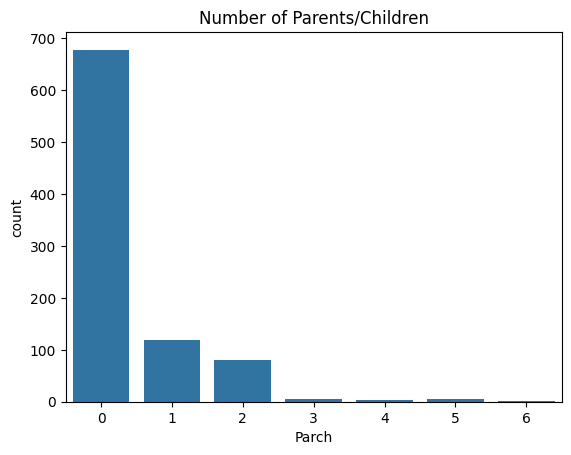

In [26]:
# Visualize the distribution of Number of Parents/Children

sns.countplot(x='Parch', data=df)
plt.title('Number of Parents/Children')
plt.show()

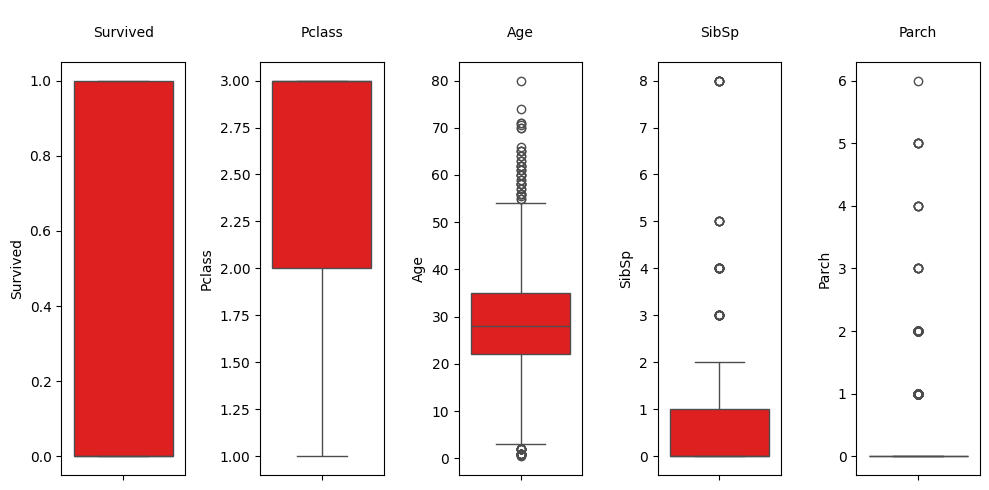

In [27]:
# plotting the boxplot of each continuas columns.

# to check outlier

plt.figure(figsize=(10,5))
plotnumber = 1

for i in range(len(con)):
    if plotnumber <= 5:
        ax = plt.subplot(1, 5, plotnumber)
        
        sns.boxplot(y = con[i], data = df, ax = ax, color='red')
        plt.title(f"\n{con[i]}\n", fontsize = 10)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

## Define x and y

In [28]:
# Define x and y variables

x=df.drop(['Survived'],axis=1)
y=df['Survived']

In [29]:
# First five rows of x DataFrame

x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [30]:
# Last five rows of y DataFrame

y.tail()

886    0
887    1
888    0
889    1
890    0
Name: Survived, dtype: int64

## Spliting data

In [31]:
# import labraries for Spliting data.

from sklearn.model_selection import train_test_split

# Data split 80 for training and 20 for testing.

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=19)

 ## Preprocessing

In [32]:
# create a list of categorical columns and continuous colums of x DataFrame

cat_x=[]
con_x=[]

for i in x.columns:
    if x[i].dtypes=='object':
        cat_x.append(i)
    else:
        con_x.append(i) 
        
print ('Cat_X :', cat_x)
print ('con_x :', con_x)

Cat_X : ['Sex', 'Embarked']
con_x : ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [33]:
# import labraries for preprocessing.

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Preprocessing for categorical data

cat_pipe = Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore'))])

# Preprocessing for numerical data

con_pipe = Pipeline(steps=[('scaler', StandardScaler())])

# Bundle preprocessing for numerical and categorical data

pre = ColumnTransformer(transformers=[('con', con_pipe, con_x),('cat', cat_pipe, cat_x)])

# Data fit

pre.fit(x)

ColumnTransformer(transformers=[('con',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Embarked'])])

In [34]:
# processed DataFrame

x1=pd.DataFrame(pre.fit_transform(x), columns=pre.get_feature_names_out())

# First five rows of preprocess x1 DataFrame

x1.head()

,con__Pclass,con__Age,con__SibSp,con__Parch,con__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,1.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,1.0,0.0,1.0,0.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,1.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,1.0,0.0,0.0,0.0,1.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0


In [35]:
# First five rows of y DataFrame

y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

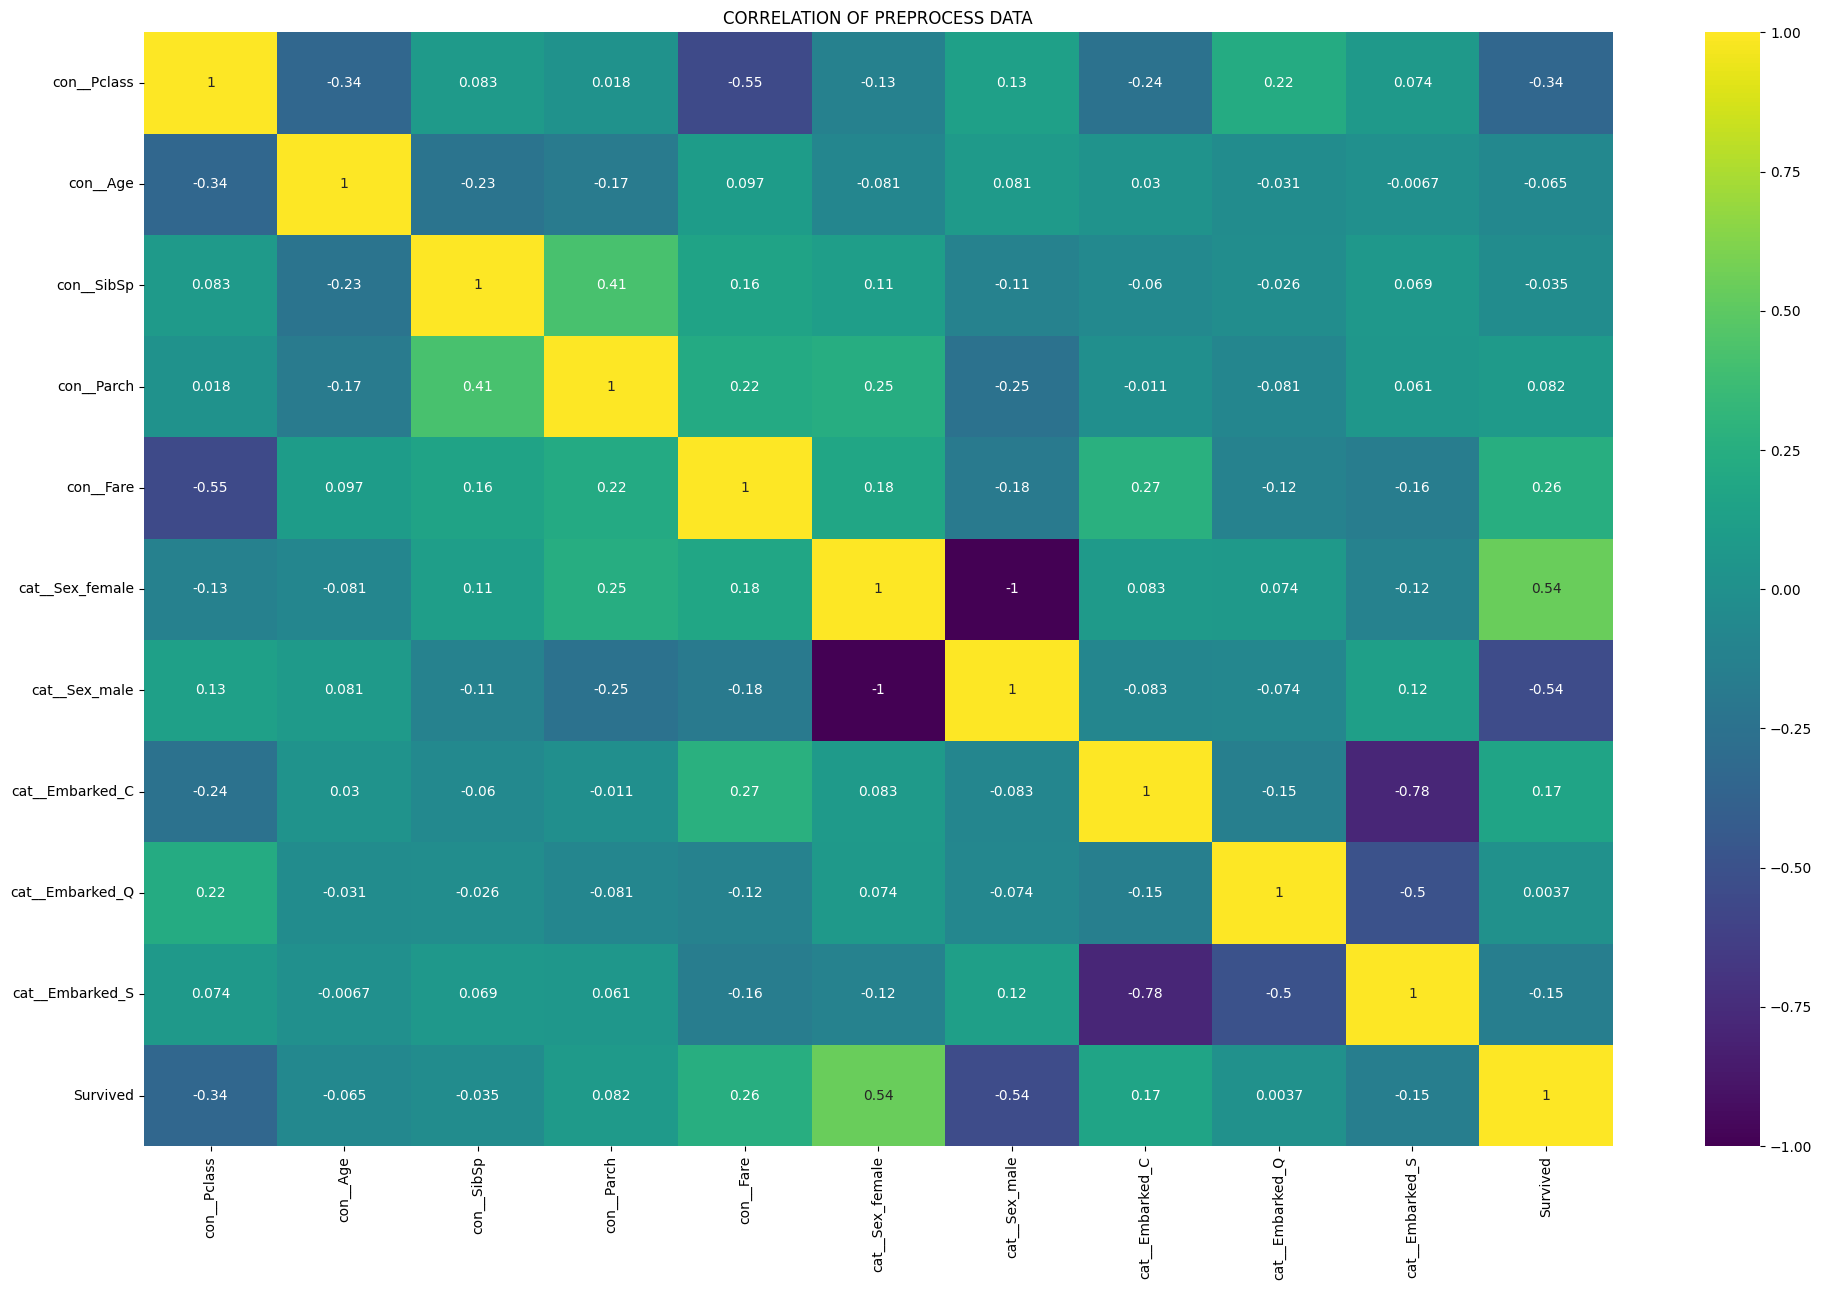

In [36]:
# finds the correlation of processed data

# using heatmap

df1=x1.join(y)    # join x1 and y for checking correlation with target variable

plt.figure(figsize=(20,13))

graph=sns.heatmap(df1.corr(), cmap='viridis', annot=True)
graph.set_title('CORRELATION OF PREPROCESS DATA')

plt.tight_layout()
plt.show()

## Model Building

1. LogisticRegression

2. DecisionTreeClassifier

3. RandomForestClassifier

4. AdaBoostClassifier

5. KNeighborsClassifier

6. SVC

In [37]:
# import labraries for model bulding for classification.

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [38]:
# Create instances

lr=LogisticRegression()
dc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
abc=AdaBoostClassifier()
knc=KNeighborsClassifier()
svc=SVC()

In [39]:
# import labraries for model evaluation.

from sklearn.metrics import accuracy_score

# Create instances list

models = [lr, dc, rfc, abc, knc, svc]

for model in models:
    
    # Create a pipeline with preprocessing and model
    
    pipeline = Pipeline(steps=[('preprocessor', pre),('model', model)])
    
    # fitting model using pipeline
    
    pipeline.fit(x_train, y_train)
    
    # Predict y_train and y_test (seen data and unseen data)
    
    y_predict_train = pipeline.predict(x_train)
    y_predict_test = pipeline.predict(x_test)
    
     # Evaluaction of train data using F1 Score and Accuracy Score 
    
    acc_train = accuracy_score(y_train, y_predict_train)
    
    # Evaluaction of test data using F1 Score and Accuracy Score
    
    acc_test = accuracy_score(y_test, y_predict_test)
    
    print('= = = =' * 15)
    print('Model Name : ', model)
    print(' * -  * ' * 13)
    print('Accuracy Score Train:', acc_train)
    print('Accuracy Score Test:', acc_test)  
    

= = = == = = == = = == = = == = = == = = == = = == = = == = = == = = == = = == = = == = = == = = == = = =
Model Name :  LogisticRegression()
 * -  *  * -  *  * -  *  * -  *  * -  *  * -  *  * -  *  * -  *  * -  *  * -  *  * -  *  * -  *  * -  * 
Accuracy Score Train: 0.7949438202247191
Accuracy Score Test: 0.8435754189944135
= = = == = = == = = == = = == = = == = = == = = == = = == = = == = = == = = == = = == = = == = = == = = =
Model Name :  DecisionTreeClassifier()
 * -  *  * -  *  * -  *  * -  *  * -  *  * -  *  * -  *  * -  *  * -  *  * -  *  * -  *  * -  *  * -  * 
Accuracy Score Train: 0.9831460674157303
Accuracy Score Test: 0.776536312849162
= = = == = = == = = == = = == = = == = = == = = == = = == = = == = = == = = == = = == = = == = = == = = =
Model Name :  RandomForestClassifier()
 * -  *  * -  *  * -  *  * -  *  * -  *  * -  *  * -  *  * -  *  * -  *  * -  *  * -  *  * -  *  * -  * 
Accuracy Score Train: 0.9831460674157303
Accuracy Score Test: 0.8659217877094972
= = = == = =

## Hyperparameter tuning for Random Forest Classifier.

In [40]:
from sklearn.model_selection import GridSearchCV

# Define the pipeline of RandomForestClassifier model

pipeline_rfc = Pipeline(steps=[('preprocessor', pre), ('model', rfc)])

# Define hyperparameter grid

param_grid = {
    'model__n_estimators': [100, 200, 300],  # Number of trees in the forest
    'model__max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'model__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'model__min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}

# Create GridSearchCV object

rfc_grid_search = GridSearchCV(pipeline_rfc,
                               param_grid=param_grid,
                               cv=5,
                               n_jobs=-1)

# Perform grid search

rfc_grid_search.fit(x_train, y_train)

# Best parameters

best_params = rfc_grid_search.best_params_

# Best score

best_score = rfc_grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'model__max_depth': 30, 'model__min_samples_leaf': 4, 'model__min_samples_split': 5, 'model__n_estimators': 100}
Best Score: 0.8117896188318724


## Model building after hyperparameter tuning

In [43]:
# Model building using best parameters

rfc_best = RandomForestClassifier(max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=100)

# Create a pipeline with preprocessing and model

pipeline_rfc_best = Pipeline(steps=[('preprocessor', pre), ('model', rfc_best)])

# Fitting the pipeline with the training data

pipeline_rfc_best.fit(x_train, y_train)

# Predicting the train set results

rfc_best_predict_train = pipeline_rfc_best.predict(x_train)
print('Predictions on train set:\n', rfc_best_predict_train)

# Predicting the test set results

rfc_best_predict_test = pipeline_rfc_best.predict(x_test)
print('Predictions on test set:\n', rfc_best_predict_test)


Predictions on train set:
 [0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0
 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1
 1 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1
 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0
 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0
 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0
 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0
 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1
 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 

In [44]:
import pickle

# Best model for predict (RandomForestClassifier)

# Save the pipeline_rfc_best to a file using pickle
with open('pipeline_rfc_best_predict.pkl', 'wb') as file1:
    pickle.dump(pipeline_rfc_best, file1)

## Model Evaluation

In [45]:
# import labraries for model evaluation.

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

Accuracy_score : 0.8707865168539326
 *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *  
Classification_report: 
               precision    recall  f1-score   support

           0       0.94      0.86      0.90       475
           1       0.76      0.89      0.82       237

    accuracy                           0.87       712
   macro avg       0.85      0.87      0.86       712
weighted avg       0.88      0.87      0.87       712

 *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *  


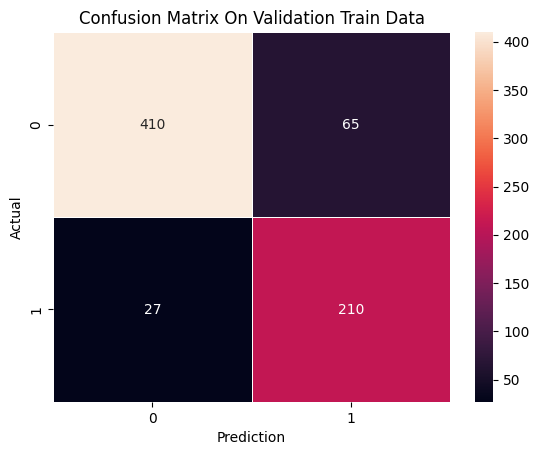

In [46]:
# Train data evaluation

# Accuracy_score

acc=accuracy_score(rfc_best_predict_train,y_train)
print ('Accuracy_score :', acc)

print (' *  -  *  '*12)

# Classification_report

clr=classification_report(rfc_best_predict_train,y_train)
print ('Classification_report: \n',clr)

print (' *  -  *  '*12)

# Confusion_metrix

cm=confusion_matrix(rfc_best_predict_train,y_train)
sns.heatmap(cm, annot=True, linewidth=0.5, fmt='d')
plt.title('Confusion Matrix On Validation Train Data')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

Accuracy_score : 0.88268156424581
 *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *  
Classification_report: 
               precision    recall  f1-score   support

           0       0.96      0.86      0.91       125
           1       0.75      0.93      0.83        54

    accuracy                           0.88       179
   macro avg       0.86      0.89      0.87       179
weighted avg       0.90      0.88      0.89       179

 *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *  


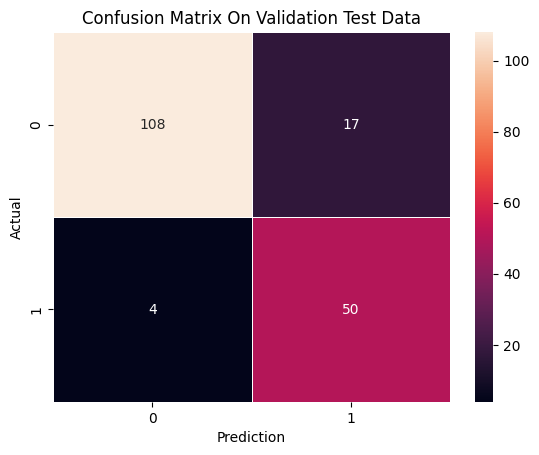

In [47]:
# Test data evaluation

# Accuracy_score

acc1=accuracy_score(rfc_best_predict_test,y_test)
print ('Accuracy_score :', acc1)

print (' *  -  *  '*12)

# Classification_report

clr1=classification_report(rfc_best_predict_test,y_test)
print ('Classification_report: \n',clr1)

print (' *  -  *  '*12)

# Confusion_metrix

cm1=confusion_matrix(rfc_best_predict_test,y_test)
sns.heatmap(cm1, annot=True, linewidth=0.5, fmt='d')
plt.title('Confusion Matrix On Validation Test Data')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

## Prediction

In [48]:
def predict_survival(pipeline):
        
    try:
        
        # Gather input data from the user

        con_Pclass = int(input('Enter the Pclass (1, 2, or 3): '))
        con_Age = float(input('Enter the Age: '))
        con_SibSp = int(input('Enter the number of Siblings/Spouses aboard: '))
        con_Parch = int(input('Enter the number of Parents/Children aboard: '))
        con_Fare = float(input('Enter the Fare: '))
        cat_Sex = str(input('Enter the Sex (male or female): '))
        cat_Embarked = str(input('Enter the Embarked Port (C, Q, or S): '))

        # Create a DataFrame from the user input

        input_data = {
            'Pclass': [con_Pclass],
            'Age': [con_Age],
            'SibSp': [con_SibSp],
            'Parch': [con_Parch],
            'Fare': [con_Fare],
            'Sex': [cat_Sex],
            'Embarked': [cat_Embarked]
        }

        # Convert input data into DataFrame
        
        input_df = pd.DataFrame(input_data, index=[0])

        # Predict survival probability
        
        y_predict = pipeline.predict(input_df)
        prob = pipeline.predict_proba(input_df).max()

        # Construct prediction message
        
        prediction = f"Predicted label: {y_predict[0]}, Probability of survival: {prob:.2f}"

        return prediction

    except Exception as e:
        
        print(f"Error: {e}")
        
        return None        

In [49]:
predict_survival(pipeline_rfc_best)

'Predicted label: 0, Probability of survival: 0.66'

In [50]:
import pickle

# Define the filename for the pickle file
filename = 'titanic_survival_model.pkl'

# Save the model to a file
with open(filename, 'wb') as file:
    pickle.dump(pipeline_rfc_best, file)